## Basic Pandas Examples - Ví dụ cơ bản Pandas

Sổ tay này sẽ hướng dẫn bạn một số khái niệm cơ bản về Pandas. Chúng ta sẽ bắt đầu bằng cách nhập các thư viện khoa học dữ liệu điển hình là Numpy và Pandas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series - Chuỗi

Series giống như một danh sách hoặc mảng 1 chiều, nhưng có chỉ mục (index - tiêu đề). Tất cả các phép toán đều được căn theo chỉ mục.

In [12]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a)
print(f"\n{b}")

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Một trong những cách sử dụng thường xuyên của chuỗi là **chuỗi thời gian**. Trong chuỗi thời gian, chỉ mục có cấu trúc đặc biệt - thường là một phạm vi ngày hoặc ngày giờ. Chúng ta có thể tạo chỉ mục như vậy với `pd.date_range`.

Giả sử chúng ta có một chuỗi cho thấy số lượng sản phẩm được mua mỗi ngày và chúng ta biết rằng mỗi chủ nhật chúng ta cũng cần lấy một mặt hàng cho chính mình. Sau đây là cách mô hình hóa điều đó bằng chuỗi:

Length of index is 366


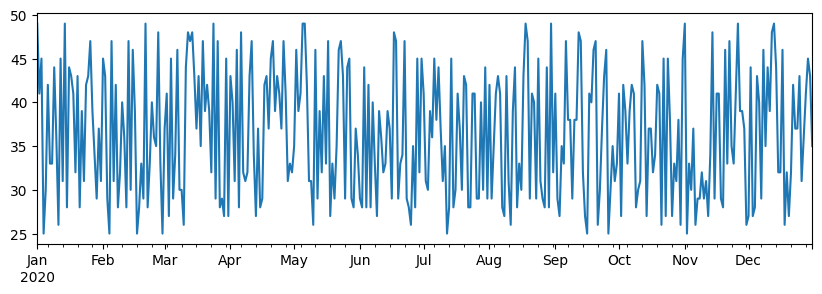

In [6]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [13]:
# Hàm tính toán lượng sản phẩm nhập mua theo hàng tuần
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")

# Hàm tính toán tổng sản phẩm = sản lượng bán + sản phẩm mua
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Như bạn có thể thấy, chúng ta đang gặp vấn đề ở chỗ chuỗi hàng tuần, những ngày không cập nhật số liệu sẽ được coi là bị thiếu số liệu (`NaN` - not a number), và khi tổng hợp số liệu tuần thì cũng bị `NaN`. Để có được kết quả chính xác, chúng ta cần dùng hàm `fill_value` để chỉ định nếu trống thì mặc định = 0:

2020-01-01    49.0
2020-01-02    41.0
2020-01-03    45.0
2020-01-04    25.0
2020-01-05    40.0
              ... 
2020-12-27    46.0
2020-12-28    41.0
2020-12-29    45.0
2020-12-30    43.0
2020-12-31    35.0
Length: 366, dtype: float64


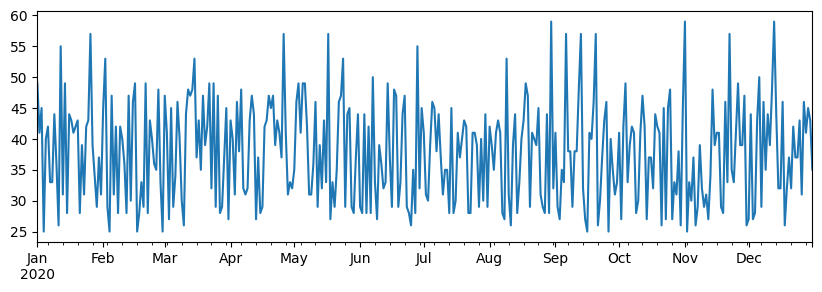

In [14]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

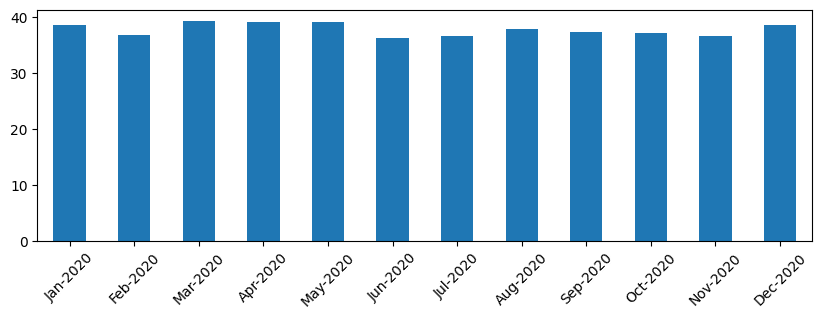

In [16]:
# Tổng hợp số liệu theo tháng:
# ME (Month End): Resample dữ liệu vào ngày cuối cùng của mỗi tháng.
# MS (Month Start): Resample dữ liệu vào ngày đầu tiên của mỗi tháng.
monthly = total_items.resample("ME").mean()
ax = monthly.plot(kind='bar', figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Một khung dữ liệu dataframe về cơ bản là một tập hợp các chuỗi có cùng chỉ mục index. Chúng ta có thể kết hợp nhiều chuỗi lại với nhau thành một khung dữ liệu. Với chuỗi `a` và `b` mà chúng ta đã định nghĩa ở phần trên:

In [17]:
df = pd.DataFrame([a,b])
df

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,I,like,to,use,Python,and,Pandas,very,much


Chúng ta cũng có thể sử dụng Series làm cột và đổi tên cột bằng lệnh sau:

In [18]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


Có thể dùng lệnh để chuyển vị (và đổi tên các cột để phù hợp với ví dụ trước):

In [19]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


Lệnh **Selecting columns (Lọc cột)** áp dụng cho DataFrame có thể thực hiện như sau:

In [20]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


Lệnh **Selecting rows (lọc hàng)**, ví dụ muốn lọc ra các hàng ở cột A từ 1->4 như sau:

In [21]:
df[df['A']<5]

,A,B
0,1,I
1,2,like
2,3,to
3,4,use


Cách thức hoạt động là biểu thức `df['A']<5` trả về một chuỗi Boolean (đại số Boolean), cho biết biểu thức là `True` hay `False` cho từng phần tử của chuỗi. Khi chuỗi được sử dụng làm chỉ mục, nó trả về tập hợp con các hàng trong DataFrame. Do đó, không thể sử dụng biểu thức boolean Python tùy ý, ví dụ, viết `df[df['A']>5 and df['A']<7]` sẽ là sai. Thay vào đó, bạn nên sử dụng phép toán `&` và dấu `[]` trên chuỗi boolean:

In [22]:
df[(df['A']>5) & (df['A']<7)]

,A,B
5,6,and


**Creating new computable columns**. Chúng ta có thể **tạo các cột tính toán mới** cho DataFrame của mình bằng cách sử dụng các biểu thức trực quan. Mã bên dưới tính toán độ phân tán của A so với giá trị trung bình của nó.

In [23]:
df['DivA'] = df['A']-df['A'].mean()
df

,A,B,DivA
0,1,I,-4.0
1,2,like,-3.0
2,3,to,-2.0
3,4,use,-1.0
4,5,Python,0.0
5,6,and,1.0
6,7,Pandas,2.0
7,8,very,3.0
8,9,much,4.0


Chúng ta đang tính toán một chuỗi, sau đó gán chuỗi này vào vế bên trái, tạo ra một cột khác.

In [24]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [25]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6
5,6,and,1.0,3
6,7,Pandas,2.0,6
7,8,very,3.0,4
8,9,much,4.0,4


**Selecting rows based on numbers** bằng cách sử dụng hàm `iloc`. Ví dụ, để chọn 5 hàng đầu tiên từ DataFrame:

In [26]:
df.iloc[:5]

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6


**Grouping** thường được sử dụng để có được kết quả tương tự như `Pivot table` trong Excel. Giả sử chúng ta có data gồm 2 cột và muốn tính giá trị trung bình `mean` của `LenB` theo các nhóm A, B và C:

In [6]:
# Bước 1: Dữ liệu mẫu có dataframe 2 cột như sau:
import pandas as pd

data = {
    'GroupColumn': ['A', 'A', 'B', 'B', 'C'],
    'LenB': ['1', '2', 'I', '4', '5'] # Trong cột này có 1 giá trị 'I' không phải dạng số
}
df = pd.DataFrame(data)
print(df)

  GroupColumn LenB
0           A    1
1           A    2
2           B    I
3           B    4
4           C    5


In [7]:
# Bước 2: Làm sạch dữ liệu
# Chuyển LenB sang dạng số, các giá trị không hợp lệ thành NaN
df['LenB'] = pd.to_numeric(df['LenB'], errors='coerce')

# Loại bỏ các hàng có NaN trong cột LenB
df = df.dropna(subset=['LenB'])


In [8]:
# Ta có dữ liệu sau làm sạch
print(df)

  GroupColumn  LenB
0           A   1.0
1           A   2.0
3           B   4.0
4           C   5.0


In [9]:
# Bước 3: Tính trung bình theo nhóm Groupby() và đếm số phần tử mỗi nhóm Size()
grouped = df.groupby('GroupColumn').aggregate({
    'LenB': ['mean', 'size']
})
print(grouped)


            LenB     
            mean size
GroupColumn          
A            1.5    2
B            4.0    1
C            5.0    1


Cách 2 là làm phẳng MultiIndex cho Cột


In [10]:
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
print(grouped.reset_index())


  GroupColumn  LenB_mean  LenB_size
0           A        1.5          2
1           B        4.0          1
2           C        5.0          1


Cách 3 là dùng hàm `lambda` trong `aggregate()`:

In [11]:
grouped = df.groupby('GroupColumn').aggregate({
    'LenB': ['mean', 'size', lambda x: x.sum()]
})
print(grouped)

            LenB                
            mean size <lambda_0>
GroupColumn                     
A            1.5    2        3.0
B            4.0    1        4.0
C            5.0    1        5.0


Cách 4 là dùng agg():

In [12]:
grouped = df.groupby('GroupColumn').agg(
    Mean_LenB=('LenB', 'mean'),
    Count_LenB=('LenB', 'size'),
    Sum_LenB=('LenB', 'sum')
).reset_index()
print(grouped)

  GroupColumn  Mean_LenB  Count_LenB  Sum_LenB
0           A        1.5           2       3.0
1           B        4.0           1       4.0
2           C        5.0           1       5.0


## So sánh aggregate() và agg()
| aggregate()	| agg()|
|---|---|
|Dùng dict với nhiều phép toán	|Hỗ trợ tuple để đặt tên rõ ràng|
|Phức tạp khi kết quả có MultiIndex	|Kết quả rõ ràng và dễ đọc|
|Ít linh hoạt hơn	|Linh hoạt, hỗ trợ tuple và hàm lambda|

## Printing (Hiển thị) and Plotting (Vẽ đồ thị)

Nhà khoa học dữ liệu thường phải khám phá dữ liệu, do đó, điều quan trọng là phải có khả năng trực quan hóa dữ liệu. Khi DataFrame lớn, nhiều khi chúng ta chỉ muốn đảm bảo rằng mình đang làm mọi thứ đúng bằng cách in ra một vài hàng đầu tiên. Bạn có thể thực hiện việc này bằng cách gọi `df.head()`. Nếu bạn chạy nó từ `Jupyter Notebook`, nó sẽ in ra `DataFrame` dưới dạng bảng đẹp mắt.

In [13]:
df.head()

,GroupColumn,LenB
0,A,1.0
1,A,2.0
3,B,4.0
4,C,5.0



Thư viện `plot` rất hữu ích cho nhiều tác vụ và hỗ trợ nhiều loại biểu đồ khác nhau thông qua tham số `kind`= parameter (tham số), bạn có thể sử dụng thư viện matplotlib raw để vẽ biểu đồ nào đó phức tạp hơn.


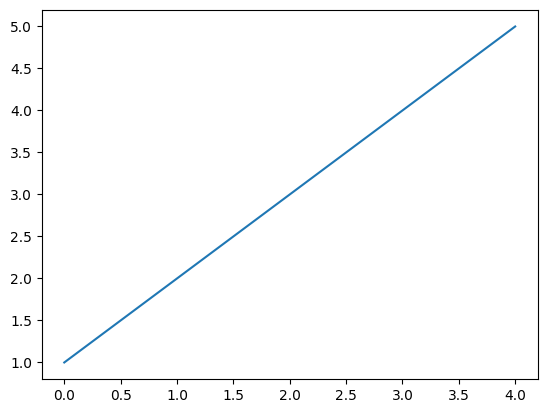

In [17]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
df['LenB'].plot()
plt.show()


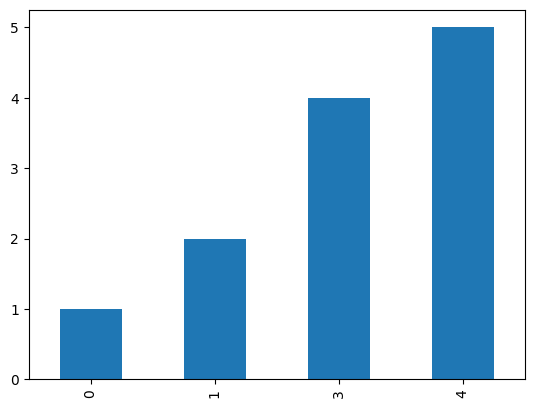

In [19]:
df['LenB'].plot(kind='bar')
plt.show()

Tổng quan này bao gồm hầu hết các khái niệm quan trọng của Pandas, tuy nhiên, thư viện rất phong phú và không có giới hạn nào cho những gì bạn có thể làm với nó!
Bây giờ chúng ta hãy áp dụng kiến ​​thức này để giải quyết vấn đề cụ thể.